In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
from sklearn.datasets import load_diabetes

diabetes = load_diabetes()
df = pd.DataFrame(data = diabetes.data, columns = diabetes.feature_names)
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


In [5]:
#diabetes.target

In [6]:
df_target = pd.DataFrame(data=diabetes.target, columns=['target'])
df_target.head(3)

,target
0,151.0
1,75.0
2,141.0


# Modelo a una sola variable

In [7]:
# Definir nuestras variables dependiente e independiente(s)
X = df[['bmi']]
y = df_target

# Separar los datos en muestras de entrenamiento y de prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0)

In [8]:
# Construir modelo de regresión lineal
modelo_regresion_simple = LinearRegression()

# Entrenar el modelo con los datos de entrenamiento
modelo_regresion_simple.fit(X_train, y_train)

# Predecir los valores de la variable objetivo (y) para los datos de prueba
y_pred = modelo_regresion_simple.predict(X_test)

In [9]:
# Calcular el error cuadrático medio (MSE) de las predicciones
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
# Imprimir el MSE
print('Error cuadrático medio (MSE): {:.2f}'.format(mse))
print('r2: {:.2f}'.format(r2))

Error cuadrático medio (MSE): 4150.68
r2: 0.19


In [10]:
print('pendiente:', modelo_regresion_simple.coef_)
print('intercepto:', modelo_regresion_simple.intercept_)

pendiente: [[981.65543614]]
intercepto: [152.28824927]


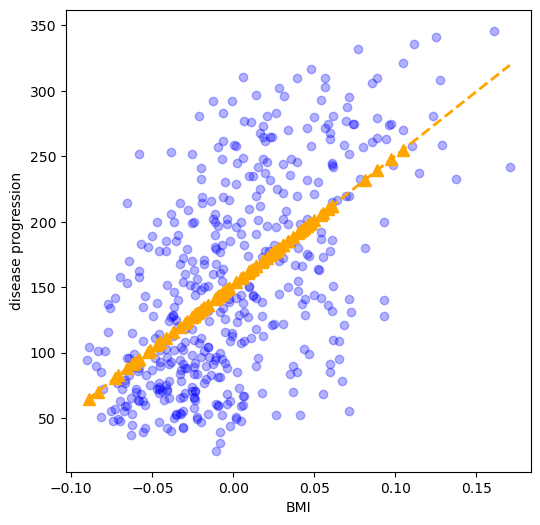

In [11]:
m = modelo_regresion_simple.coef_
b = modelo_regresion_simple.intercept_
z = np.linspace(X.min(), X.max(), 100)

fig, ax = plt.subplots(figsize=(6,6))
ax.plot(X.values, y.values, 'ob', alpha=0.3)
ax.plot(z, m*z + b, ls='--', color='orange', lw=2)
plt.plot(X_test.values, y_pred, '^', color='orange', ms=8)
ax.set_xlabel('BMI')
ax.set_ylabel('disease progression');

# Modelo con dos variables

In [12]:
# Definir nuestras variables dependiente e independiente(s)
X = df[['bmi', 'bp']]
y = df_target

# Separar los datos en muestras de entrenamiento y de prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0)

In [26]:
# Construir modelo de regresión lineal
modelo_regresion_multiple = LinearRegression()

# Entrenar el modelo con los datos de entrenamiento
modelo_regresion_multiple.fit(X_train, y_train)

# Predecir los valores de la variable objetivo (y) para los datos de prueba
y_pred = modelo_regresion_multiple.predict(X_test)

In [27]:
# Calcular el error cuadrático medio (MSE) de las predicciones
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
# Imprimir el MSE
print('Error cuadrático medio (MSE): {:.2f}'.format(mse))
print('r2: {:.2f}'.format(r2))

Error cuadrático medio (MSE): 3701.79
r2: 0.28


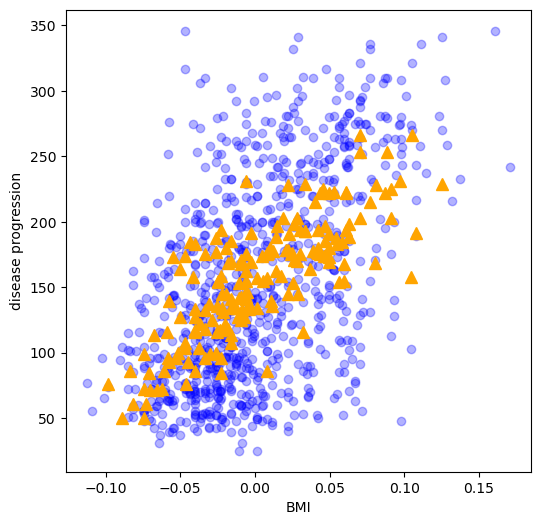

In [28]:
m = modelo_regresion_multiple.coef_
b = modelo_regresion_multiple.intercept_

fig, ax = plt.subplots(figsize=(6,6))

ax.plot(X.values, y.values, 'ob', alpha=0.3)
plt.plot(X_test.values, y_pred, '^', color='orange', ms=8)
ax.set_xlabel('BMI')
ax.set_ylabel('disease progression');

C:\Users\Ana Veronica\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


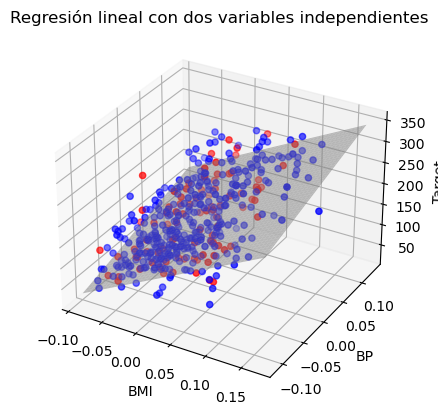

In [22]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

# Crear una figura y un conjunto de ejes 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Graficar los puntos de datos de entrenamiento en 3D
ax.scatter(X_train['bmi'], X_train['bp'], y_train, c='b', marker='o')

# Graficar los puntos de datos de prueba en 3D
ax.scatter(X_test['bmi'], X_test['bp'], y_test, c='r', marker='o')

# Graficar la superficie de la regresión lineal
x1 = np.linspace(X['bmi'].min(), X['bmi'].max(), 100)
x2 = np.linspace(X['bp'].min(), X['bp'].max(), 100)
x1, x2 = np.meshgrid(x1, x2)
y_pred = modelo_regresion_simple.predict(np.c_[x1.ravel(), x2.ravel()])
y_pred = y_pred.reshape(x1.shape)
ax.plot_surface(x1, x2, y_pred, color='gray', alpha=0.5)

# Agregar etiquetas de los ejes y el título
ax.set_xlabel('BMI')
ax.set_ylabel('BP')
ax.set_zlabel('Target')
ax.set_title('Regresión lineal con dos variables independientes')

# Mostrar el gráfico
plt.show()

In [30]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(modelo_regresion_multiple, X, y, cv=5)

# imprimir los scores de cada fold
print('Scores de cada fold:', scores)

# imprimir el promedio de los scores
print('Score promedio:', scores.mean())

Scores de cada fold: [0.25695021 0.39571208 0.42297968 0.36649183 0.44268575]
Score promedio: 0.3769639099242271


# Modelo cuadratico

In [39]:
from sklearn.preprocessing import PolynomialFeatures
# Definir nuestras variables dependiente e independiente(s)
X = df[['bmi', 'bp']]
y = df_target

# Separar los datos en muestras de entrenamiento y de prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0)

# Convertir la variable independiente en una matriz de características polinomiales de segundo grado
poly_features = PolynomialFeatures(degree=2)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

# Construir modelo de regresión cuadrática
modelo_regresion_cuadratica = LinearRegression()

# Entrenar el modelo con los datos de entrenamiento
modelo_regresion_cuadratica.fit(X_train_poly, y_train)

m = modelo_regresion_cuadratica.coef_
b = modelo_regresion_cuadratica.intercept_

print(m)
print(b)

# Calcular el error cuadrático medio (MSE) de las predicciones
y_pred = modelo_regresion_cuadratica.predict(X_test_poly)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
# Imprimir el MSE
print('Error cuadrático medio (MSE): {:.2f}'.format(mse))
print('r2: {:.2f}'.format(r2))

[[   0.          823.01649091  360.97424152   12.47526764 2309.88350219
   819.04139978]]
[148.40161921]
Error cuadrático medio (MSE): 3654.01
r2: 0.29
